Drive Mount


In [1]:
#for mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


impot libraries


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Visualize the Data with Class


In [24]:
# Define the path to your dataset directory
dataset_dir = '/content/drive/MyDrive/project_17_18/MFCC_Dataset'

# Initialize empty lists to store data and labels
data = []
labels = []

# Iterate over each class directory
for class_folder in os.listdir(dataset_dir):
    class_folder_path = os.path.join(dataset_dir, class_folder)

    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Iterate over each file in the class directory
        for file_name in os.listdir(class_folder_path):
            if file_name.endswith('.MFC'):
                file_path = os.path.join(class_folder_path, file_name)

                # Read the data from the .MFC file
                with open(file_path, 'r') as file:
                    lines = file.readlines()

                    # Extract the data values (assuming the values start from line 1)
                    data_values = [float(line.strip()) for line in lines[1:]]

                    # Append the data and its corresponding class label to lists
                    data.append(data_values)
                    labels.append(class_folder)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print("Number of Data = ", len(data))
print("Number of Class = ", len(class_folder)+1)

Number of Data =  300
Number of Class =  10


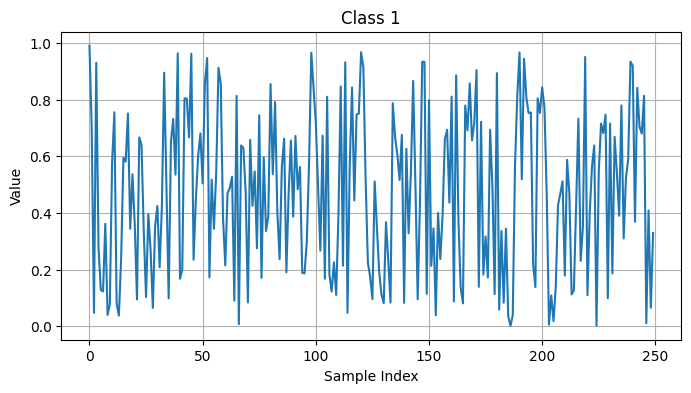

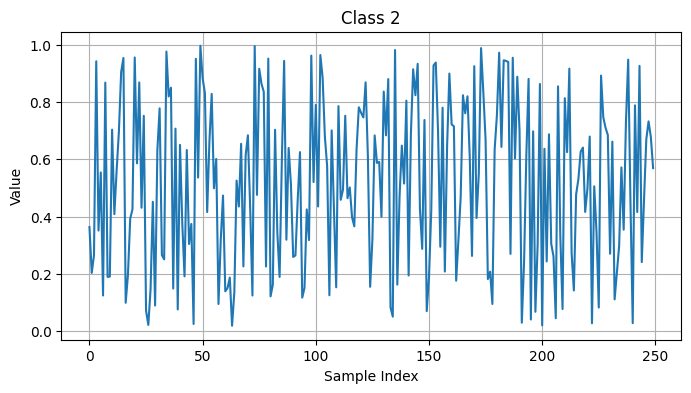

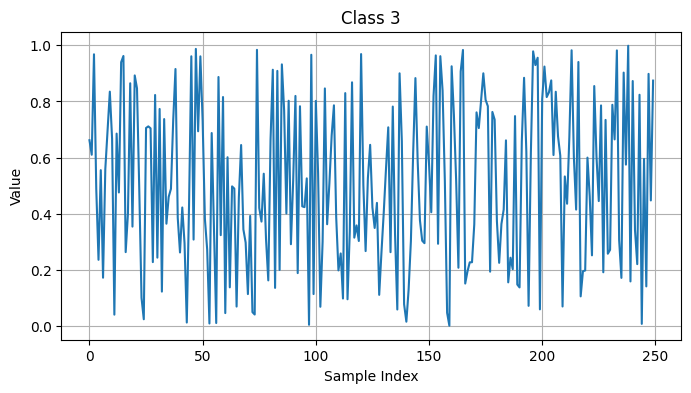

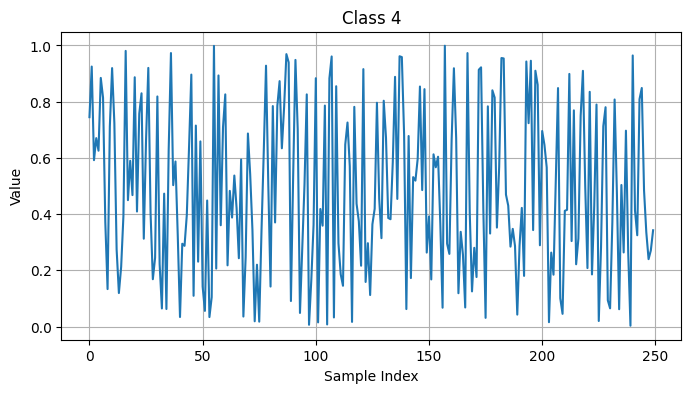

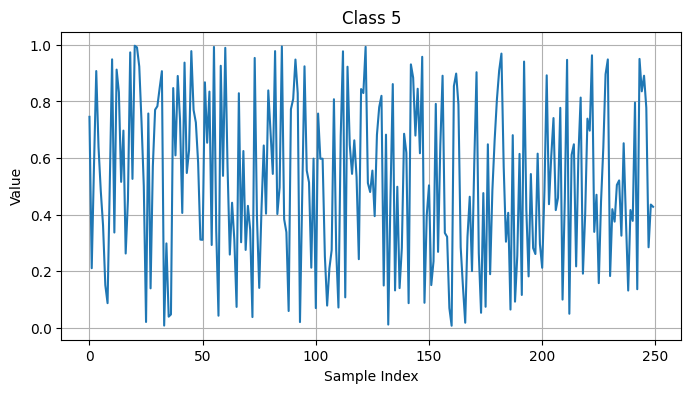

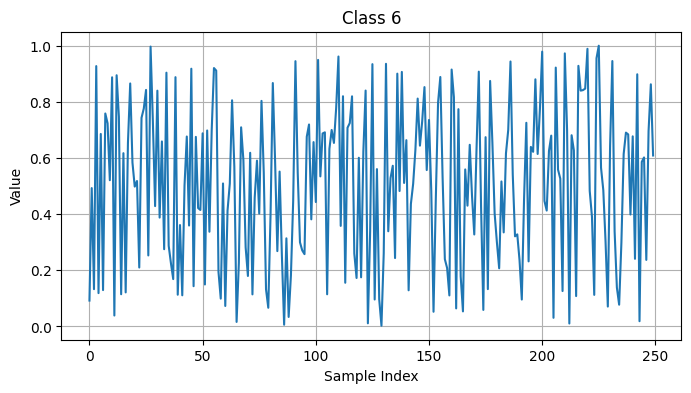

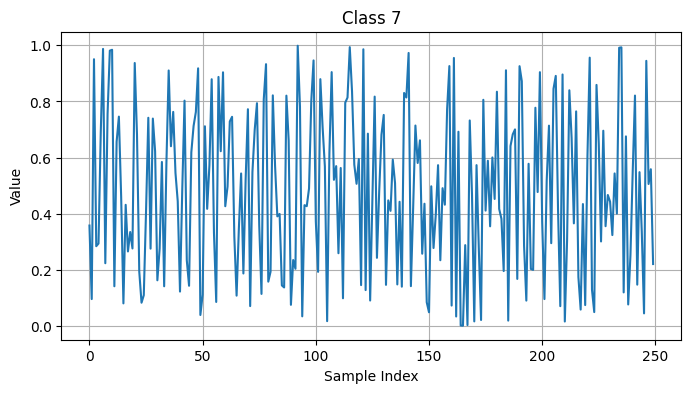

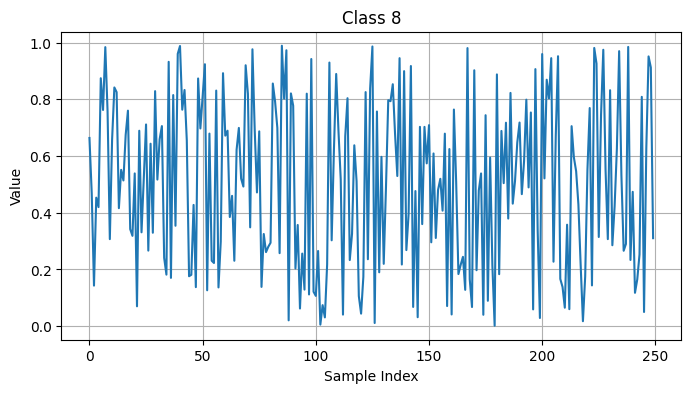

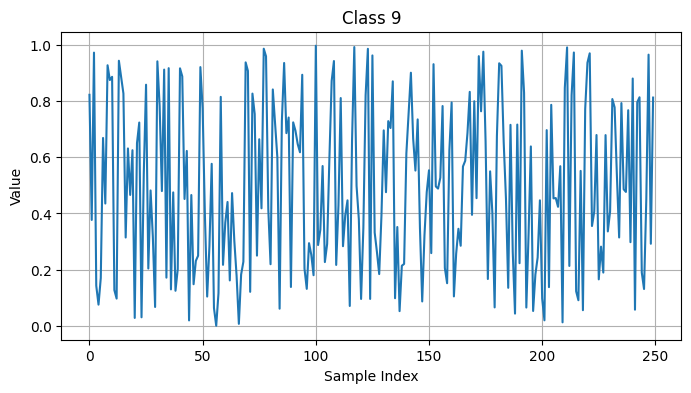

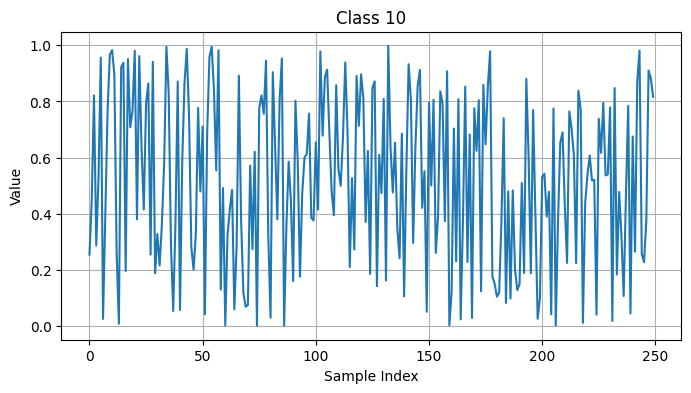

In [25]:
data = [np.random.rand(250) for _ in range(10)]  # Replace this with your actual data

# Create a function to plot a single data sample
def plot_data(data_sample, title):
    plt.figure(figsize=(8, 4))
    plt.plot(data_sample)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Loop through your data and plot each data sample
for i, data_sample in enumerate(data):
    plot_data(data_sample, f'Class {i + 1}')


## SVM for mfc file

In [28]:
# Define the path to your dataset directory
dataset_dir = '/content/drive/MyDrive/project_17_18/MFCC_Dataset'

# Initialize empty lists to store data and labels
data = []
labels = []

# Iterate over each class directory
for class_folder in os.listdir(dataset_dir):
    class_folder_path = os.path.join(dataset_dir, class_folder)

    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Iterate over each file in the class directory
        for file_name in os.listdir(class_folder_path):
            if file_name.endswith('.MFC'):
                file_path = os.path.join(class_folder_path, file_name)

                # Read the data from the .MFC file
                with open(file_path, 'r') as file:
                    lines = file.readlines()

                    # Extract the data values (assuming the values start from line 1)
                    data_values = [float(line.strip()) for line in lines[1:]]

                    # Append the data and its corresponding class label to lists
                    data.append(data_values)
                    labels.append(class_folder)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into training and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Calculate the loss using hinge loss
loss = 1 - accuracy
print(f"Loss: {loss * 100:.2f}%")

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=np.unique(labels))
print("Classification Report:")
print(class_report)


Accuracy: 98.33%
Precision: 98.75%
Recall: 98.33%
Loss: 1.67%
Classification Report:
              precision    recall  f1-score   support

     class_A       1.00      1.00      1.00         2
    class_AA       1.00      1.00      1.00         5
     class_E       1.00      1.00      1.00         5
    class_KA       1.00      0.92      0.96        12
    class_MO       1.00      1.00      1.00         5
     class_O       1.00      1.00      1.00         7
    class_OA       0.75      1.00      0.86         3
   class_SHA       1.00      1.00      1.00         6
    class_TA       1.00      1.00      1.00         9
     class_U       1.00      1.00      1.00         6

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.99      0.98      0.98        60



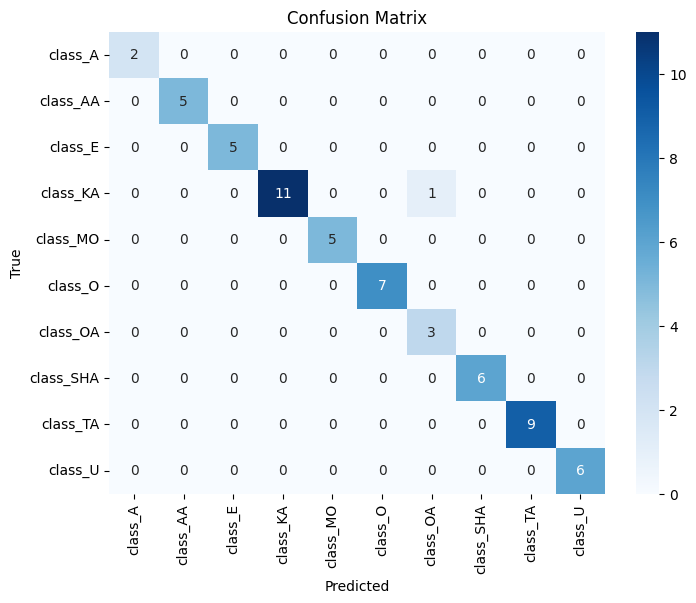

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Define the path where you want to save the PDF
save_path = '/content/drive/MyDrive/data/SVMcm.pdf'  # Replace with your desired path

# Save the figure as a PDF to the specified location
plt.savefig(save_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


In [30]:
# save the SVM model
import joblib

# Your SVM model should be trained and stored in the 'svm_classifier' variable
joblib.dump(svm_classifier, '/content/drive/MyDrive/project_17_18/svm_model.pkl')


['/content/drive/MyDrive/MachineLearning/MFCC_Dataset/svm_model.pkl']

##RNN model